# ML Assignment 1
A simple machine learning model to accurately classify whether or not the patients in the dataset have diabetes or not

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sns
%matplotlib inline
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split 

Reading the CSV file and making a dataframe from it:

In [ ]:
df = pd.read_csv("Pima_Indian_diabetes.csv")

In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,742.000000,752.000000,768.000000,746.000000,768.000000,757.000000,768.000000,749.000000,768.000000
mean,3.866601,119.966097,68.886078,20.309879,79.799479,31.711151,0.471876,33.761336,0.348958
std,3.479971,32.367659,19.427448,15.974523,115.244002,8.544789,0.331329,12.297409,0.476951
min,-5.412815,0.000000,-3.496455,-11.945520,0.000000,-16.288921,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.100000,0.243750,24.000000,0.000000
50%,3.000000,116.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.250000,36.500000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
features = ['Pregnancies','Glucose', 'BloodPressure','SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

Filling the missing values by a random number picked between mean +/- std-dev

In [5]:
for feature in features:
    df[feature].fillna(value=np.random.normal(df[feature].mean(), df[feature].std()), inplace=True)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.872113,119.119274,68.886078,19.698522,79.799479,31.595254,0.471876,33.264251,0.348958
std,3.420607,32.550862,19.427448,16.141752,115.244002,8.537674,0.331329,12.539279,0.476951
min,-5.412815,0.000000,-3.496455,-11.945520,0.000000,-16.288921,0.078000,13.668620,0.000000
25%,1.000000,97.000000,62.000000,0.000000,0.000000,26.800000,0.243750,24.000000,0.000000
50%,3.000000,115.000000,72.000000,22.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,139.000000,80.000000,32.000000,127.250000,36.425000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
for feature in features:
    df.loc[df[feature] < 0, feature] = 0

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.891201,119.119274,68.895389,19.775787,79.799479,31.644105,0.471876,33.264251,0.348958
std,3.384988,32.550862,19.393614,16.032688,115.244002,8.318094,0.331329,12.539279,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,13.668620,0.000000
25%,1.000000,97.000000,62.000000,0.000000,0.000000,26.800000,0.243750,24.000000,0.000000
50%,3.000000,115.000000,72.000000,22.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,139.000000,80.000000,32.000000,127.250000,36.425000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.loc[df.Insulin >250, 'Insulin'] = 250

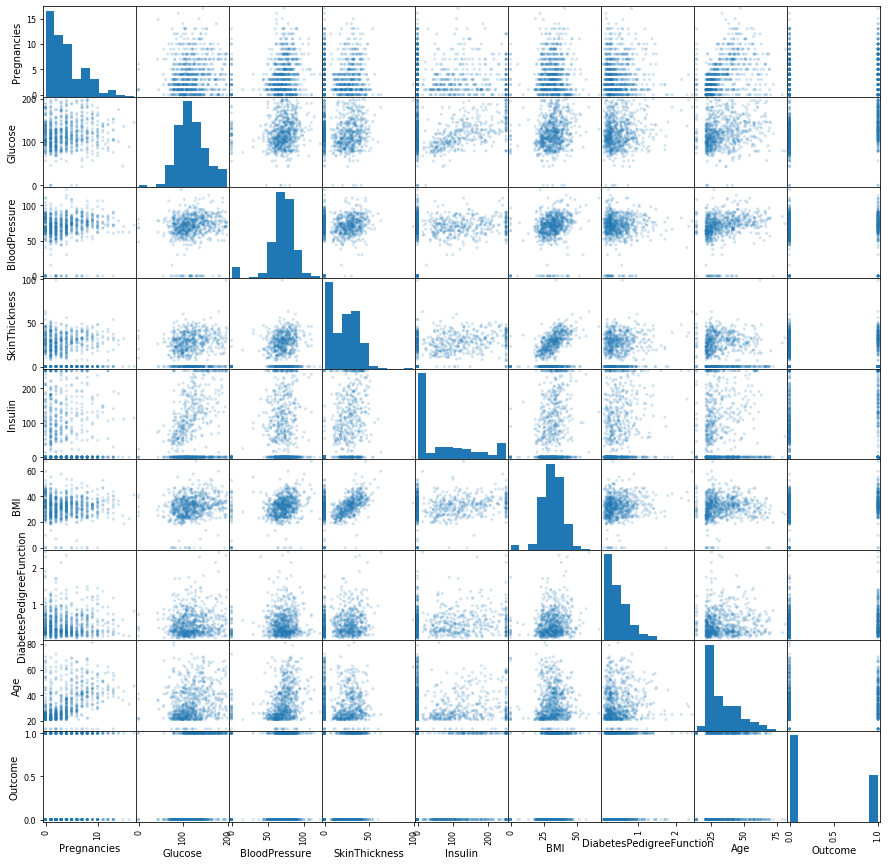

In [10]:
plot = scatter_matrix(df, alpha=0.2, figsize=(15, 15))

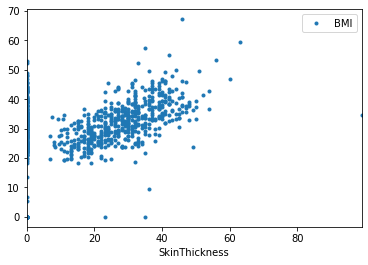

In [11]:
df.plot(x='SkinThickness', y='BMI', style='.')

In [12]:
zero_insulin_data = df[ df.Insulin == 0 ]
non_zero_insulin_data = df[ df.Insulin != 0]

train_X = non_zero_insulin_data['Glucose'].values.reshape(-1,1)
train_y = non_zero_insulin_data['Insulin'].values.reshape(-1,1)
val_X = zero_insulin_data['Glucose'].values.reshape(-1,1)

model = LinearRegression()
model.fit(train_X, train_y)
predicted_y = model.predict(val_X)

j = 0
for i in df.index:
    if df.at[i, 'Insulin'] == 0:
        df.at[i, 'Insulin'] = predicted_y[j][0]
        j+=1


In [13]:
zero_SkinThickness_data = df[ df.SkinThickness == 0 ]
non_zero_SkinThickness_data = df[ df.SkinThickness != 0]

train_X = non_zero_SkinThickness_data['BMI'].values.reshape(-1,1)
train_y = non_zero_SkinThickness_data['SkinThickness'].values.reshape(-1,1)
val_X = zero_SkinThickness_data['BMI'].values.reshape(-1,1)

model = LinearRegression()
model.fit(train_X, train_y)
predicted_y = model.predict(val_X)

j = 0
for i in df.index:
    if df.at[i, 'SkinThickness'] == 0:
        df.at[i, 'SkinThickness'] = predicted_y[j][0]
        j+=1



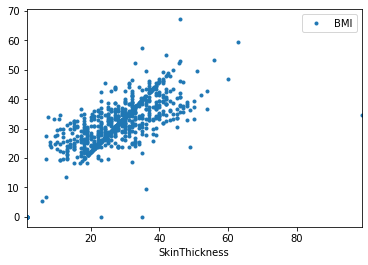

In [14]:
df.plot(x='SkinThickness', y='BMI', style='.')

In [15]:
for feature in features:
    df[feature] = (df[feature] - df[feature].mean())/(df[feature].std())
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,768.000000
mean,3.683396e-16,-1.257675e-16,8.224758e-16,-3.415237e-16,1.063385e-15,1.640832e-15,1.914195e-15,-9.523632e-16,0.348958
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.476951
min,-1.149546e+00,-3.659481e+00,-3.552478e+00,-2.677132e+00,-2.620488e+00,-3.804250e+00,-1.188778e+00,-1.562740e+00,0.000000
25%,-8.541244e-01,-6.795296e-01,-3.555495e-01,-6.123343e-01,-7.048848e-01,-5.823577e-01,-6.885198e-01,-7.388185e-01,0.000000
50%,-2.632804e-01,-1.265488e-01,1.600842e-01,-9.701326e-03,-1.346171e-01,4.278559e-02,-2.999328e-01,-3.400714e-01,0.000000
75%,6.229855e-01,6.107588e-01,5.725911e-01,5.899362e-01,6.096552e-01,5.747585e-01,4.659233e-01,6.169214e-01,1.000000
max,3.872627e+00,2.454028e+00,2.738252e+00,7.086009e+00,1.990858e+00,4.262502e+00,5.879733e+00,3.806898e+00,1.000000


In [34]:
accuracy = []

for i in range(100):
    df = df.sample(frac=1)
    X = df[df.columns[0:8]]
    y = df[df.columns[8]] 
    
    trainX, valX, trainY, valY = train_test_split(X, y, test_size = 0.20)
    lr = LogisticRegression(max_iter=2000, solver='lbfgs')
    lr.fit(trainX, trainY)
    accuracy.append(lr.score(valX, valY)*100)

In [36]:
average_accuracy = sum(accuracy)/len(accuracy)

In [37]:
print(average_accuracy, max(accuracy), min(accuracy))

76.2662337662338 84.4155844155844 69.48051948051948
